# Examen Practique 
Author: Ricardo Vallejo

# Exercice 3 :  Classification arbre de décision [30 pts]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

data = pd.read_excel("ExamenDATA.xlsx")
pd.set_option('display.max_rows', None)
display(data)

,ID,AgeRange,Occupation,Gender,Happy
0,1,Young,Tutor,F,Yes
1,2,Middle-aged,Professor,F,No
2,3,Old,Tutor,M,Yes
3,4,Middle-aged,Professor,M,Yes
4,5,Old,Tutor,F,Yes
5,6,Young,Lecturer,M,No
6,7,Middle-aged,Lecturer,F,No
7,8,Old,Tutor,F,No


# 1. Development de model

In [15]:
data.loc[data['AgeRange'] == 'Young', 'AgeRangeNumber'] = 1
data.loc[data['AgeRange'] == 'Middle-aged', 'AgeRangeNumber'] = 2
data.loc[data['AgeRange'] == 'Old', 'AgeRangeNumber'] = 3


data.loc[data['Occupation'] == 'Tutor', 'OccupationNumber'] = 1
data.loc[data['Occupation'] == 'Professor', 'OccupationNumber'] = 2
data.loc[data['Occupation'] == 'Lecturer', 'OccupationNumber'] = 3


data.loc[data['Gender'] == 'M', 'GenderNumber'] = 0
data.loc[data['Gender'] == 'F', 'GenderNumber'] = 1


data.loc[data['Happy'] == 'Yes', 'HappyNumber'] = 1
data.loc[data['Happy'] == 'No', 'HappyNumber'] = 0


data.head(5)

,ID,AgeRange,Occupation,Gender,Happy,AgeRangeNumber,OccupationNumber,GenderNumber,HappyNumber
0,1,Young,Tutor,F,Yes,1.0,1.0,1.0,1.0
1,2,Middle-aged,Professor,F,No,2.0,2.0,1.0,0.0
2,3,Old,Tutor,M,Yes,3.0,1.0,0.0,1.0
3,4,Middle-aged,Professor,M,Yes,2.0,2.0,0.0,1.0
4,5,Old,Tutor,F,Yes,3.0,1.0,1.0,1.0


In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data[['AgeRangeNumber', 'OccupationNumber', 'GenderNumber']], data['HappyNumber'], test_size=0.20, random_state=4) 

[Text(223.2, 362.4, 'OccupationNumber <= 1.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Happy'),
 Text(111.6, 217.44, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = UnHappy'),
 Text(334.79999999999995, 217.44, 'GenderNumber <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Happy'),
 Text(223.2, 72.47999999999996, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Happy'),
 Text(446.4, 72.47999999999996, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Happy')]

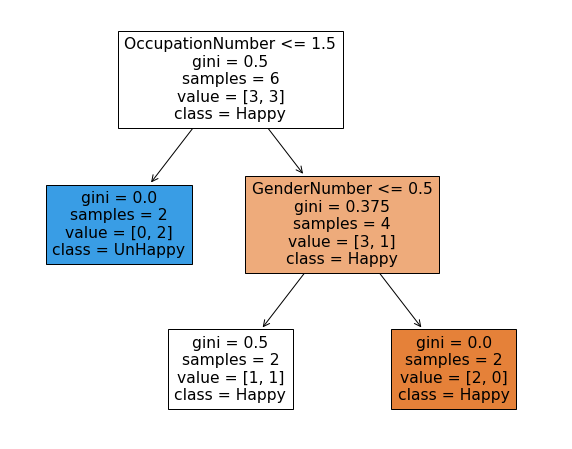

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(X_train, y_train)
plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = ['AgeRangeNumber', 'OccupationNumber', 'GenderNumber'], class_names = ['Happy', 'UnHappy'], filled = True)





In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


# 2.  Prediction

In [18]:
#AgeRangeNumber = young = 1  
#OccupationNumber = profeseur = 2
#GenderNumber = F = 1
X_prediction = [[1, 2, 1]]
Y_prediction = desicionTree.predict(X_prediction)
print(Y_prediction)

[0.]


Prediction = 0 = UNHAPPY

In [19]:
#classes prédites, utilisation de echantillon test
y_pred = desicionTree.predict(X_test) 

#Obtention de la matrice de confusion
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print (cm) 


[[0 1]
 [0 1]]


From 2 donnes de test, une a ete bien predite et pas l'autre.

On a besoin de plus de donnes pour evaluer mieux le model.

# Excercise 2:  Naive Bayes

Il est repondu aussi sur papier.  See doc word ci-joint

In [27]:
data2 = pd.read_excel("ExamenDATA2.xlsx")
pd.set_option('display.max_rows', None)
display(data2)

,Temps de réflexion(min),Complexité de la question,Qualité de la réponse,TN,CN,QN
0,10,simple,Excellente,1,0,2
1,10,élevé,Moyenne,1,2,1
2,20,moyenne,Bonne,2,1,0
3,30,simple,Bonne,3,0,0
4,40,moyenne,Excellente,4,1,3
5,40,moyenne,Bonne,4,1,0
6,50,élevé,Bonne,5,2,0


In [33]:
features = ['TN', 'CN']
target = ['QN']
X=data2[features]
y=data2[target]

In [34]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X, y)

C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# Prediction:

# temps de réflexion de 20 min   et une complexité = élevé

Xpred = [[2, 2]]
ypredicted = gnb.predict(Xpred)
print(ypredicted)



[0]
